# Movie Recommender System

Basic recommender system using Python and pandas.

Movies will be suggested by similarity to other movies. To make the system more robust implement ability to find movies across users that both have rated well and the cross-reccommend movies that have not been viewed.

In [1]:
import numpy as np
import pandas as pd

There are two relevant datasets, movie titles and user ratings of the movies.

In [2]:
# Read the ratings data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('Rating-data.csv', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949.0
1,0,172,5,881250949.0
2,0,133,1,881250949.0
3,196,242,3,881250949.0
4,186,302,3,891717742.0


In [3]:
# Read movie titles and Ids
title_column_names = ['item_id', 'title']
movie_titles = pd.read_csv('Movie-titles.csv', encoding = "ISO-8859-1", names=title_column_names)
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
# Merge ratings and title dataframes
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949.0,Star Wars (1977)
1,290,50,5,880473582.0,Star Wars (1977)
2,79,50,4,891271545.0,Star Wars (1977)
3,2,50,5,888552084.0,Star Wars (1977)
4,8,50,5,879362124.0,Star Wars (1977)


### Exploratory Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Create a new dataframe with average rating and number of ratings

In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Aiqing wansui (1994)                    5.0
Delta of Venus (1994)                   5.0
Santa with Muscles (1996)               5.0
Saint of Fort Washington, The (1993)    5.0
Star Kid (1997)                         5.0
Name: rating, dtype: float64

In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             486
Contact (1997)               423
Return of the Jedi (1983)    418
Fargo (1996)                 403
Scream (1996)                399
Name: rating, dtype: int64

In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.000000
101 Dalmatians (1996),2.965116
12 Angry Men (1957),4.323529
187 (1997),3.027778


In [10]:
# Add column for the number of ratings
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.000000,3
101 Dalmatians (1996),2.965116,86
12 Angry Men (1957),4.323529,102
187 (1997),3.027778,36


<AxesSubplot:>

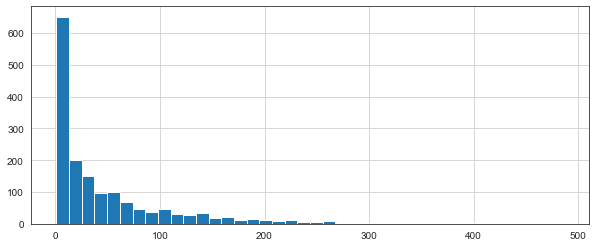

In [11]:
# Vizualize number of ratings
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=40)

<AxesSubplot:>

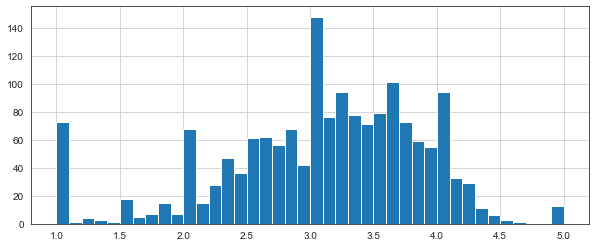

In [12]:
# Vizualize average rating
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=40)

Most ratings seem to be around 3.0 which makes sense.

### Recommending Similar Movies

Next step is to create a martix that has the user ids on one axis and the movie titles on the other. Each cell will then be the rating of a movie by an individual user.

In [13]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is not surprising to have many NaNs as most users have not rated every movie in the dataset.

In [14]:
# Most rated movies
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.368313,486
Contact (1997),3.808511,423
Return of the Jedi (1983),4.038278,418
Fargo (1996),4.183623,403
Scream (1996),3.468672,399
"English Patient, The (1996)",3.647668,386
Liar Liar (1997),3.161039,385
Toy Story (1995),3.875000,360
Independence Day (ID4) (1996),3.472934,351


I chose two movies to take a closer look at: Star Wars and Liar Liar.

In [19]:
# Get the ratings of every user for each of the selected movies
starwars_user_ratings = moviemat['Star Wars (1977)']
liar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [18]:
liar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

Check if there are correlations between ratings of the two movies for each user.

In [20]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(dumb_user_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Removing NaNs and converting the series of ratings into dataframes

In [21]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-1.000000
101 Dalmatians (1996),0.113957
12 Angry Men (1957),0.236882
187 (1997),0.146732


Sorting by correlation will give us movies that users tended to rate the most similarly. Some of the results seem strange. This is likely due to Star Wars being the most rated movie. Many of the other movies that are highly correlated have few ratings and so they data may not be as reliable.

In [22]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
'Til There Was You (1997),1.0
Prisoner of the Mountains (Kavkazsky Plennik) (1996),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
"Forbidden Christ, The (Cristo proibito, Il) (1950)",1.0
Midnight Dancers (Sibak) (1994),1.0
"Designated Mourner, The (1997)",1.0
Hollow Reed (1996),1.0
Ed's Next Move (1996),1.0


I will fix this by filtering out movies that have less than 100 ratings. I chose 100 ratings based on the histogram earlier for number of ratings.



In [23]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-1.000000,3
101 Dalmatians (1996),0.113957,86
12 Angry Men (1957),0.236882,102
187 (1997),0.146732,36


In [24]:
# sort the titles by number of ratings
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,486
"Empire Strikes Back, The (1980)",0.780203,297
Return of the Jedi (1983),0.717535,418
Raiders of the Lost Ark (1981),0.542405,336
Indiana Jones and the Last Crusade (1989),0.390308,264


In [25]:
# Repeat the process for Liar Liar
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,385
Multiplicity (1996),0.489120,111
Jurassic Park (1993),0.466530,202
G.I. Jane (1997),0.464462,141
"Long Kiss Goodnight, The (1996)",0.464443,152


The results make sense. The system has plenty of room for improvement, however, it still recommended the other Star Wars movies and other movies by George Lucas for users who rated Star Wars highly.

The recommendations for Liar Liar are more questionable, but it does have another movie with Jim Carrey in the recommendation. 